<a href="https://colab.research.google.com/github/Stekosan/merrer/blob/main/Copy_of_SparkNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's set up SparkNLP.

In [107]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2024-07-27 08:13:26--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 3.86.22.73
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|3.86.22.73|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2024-07-27 08:13:26--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1191 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.16K  --.-KB/s    in 0s      

2024-07-27 08:13:26 (64.6 MB/s) - written to stdout [1191/1191]

Installing PySpark

In [108]:
import sparknlp
spark = sparknlp.start()

from sparknlp.pretrained import PretrainedPipeline

In [109]:
pipeline = PretrainedPipeline("explain_document_ml")

explain_document_ml download started this may take some time.
Approx size to download 9 MB
[OK!]


We can use some recent headlines.

In [110]:
hls = [ # was headlines
		"She",
		"He",
		"her",
		"him",
		"hers",
		"his"
	]

Let's use SparkNLP to analyze these headlines.

In [111]:
# Use dataframes, or...
# data = spark.createDataFrame(hls).toDF("text")
# dfs = pipeline.transform(data)
# ... use list comprehension
dfs = [pipeline.annotate(hl) for hl in hls] # I don't know how to use dataframes

In [112]:
# its big
dfs

[{'document': ['She'],
  'spell': ['She'],
  'pos': ['PRP'],
  'lemmas': ['She'],
  'token': ['She'],
  'stems': ['she'],
  'sentence': ['She']},
 {'document': ['He'],
  'spell': ['He'],
  'pos': ['PRP'],
  'lemmas': ['He'],
  'token': ['He'],
  'stems': ['he'],
  'sentence': ['He']},
 {'document': ['her'],
  'spell': ['her'],
  'pos': ['PRP$'],
  'lemmas': ['she'],
  'token': ['her'],
  'stems': ['her'],
  'sentence': ['her']},
 {'document': ['him'],
  'spell': ['him'],
  'pos': ['PRP'],
  'lemmas': ['he'],
  'token': ['him'],
  'stems': ['him'],
  'sentence': ['him']},
 {'document': ['hers'],
  'spell': ['hers'],
  'pos': ['NNS'],
  'lemmas': ['hers'],
  'token': ['hers'],
  'stems': ['her'],
  'sentence': ['hers']},
 {'document': ['his'],
  'spell': ['his'],
  'pos': ['PRP$'],
  'lemmas': ['he'],
  'token': ['his'],
  'stems': ['hi'],
  'sentence': ['his']}]

Let's say we want to fuse part-of-speech tags to words, to make word differentiation easier.

In [113]:
# Extract words and parts-of-speech
tok_tag = [(df['token'],df['pos']) for df in dfs]

In [114]:
# Still big
tok_tag

[(['She'], ['PRP']),
 (['He'], ['PRP']),
 (['her'], ['PRP$']),
 (['him'], ['PRP']),
 (['hers'], ['NNS']),
 (['his'], ['PRP$'])]

In [115]:
# fuse pos to word
zips = [list(zip(tt[0], tt[1])) for tt in tok_tag]

In [116]:
# not too big
zips

[[('She', 'PRP')],
 [('He', 'PRP')],
 [('her', 'PRP$')],
 [('him', 'PRP')],
 [('hers', 'NNS')],
 [('his', 'PRP$')]]

In [117]:
tagged = [" ".join(["".join(word) for word in hl]) for hl in zips]

In [118]:
tagged

['ShePRP', 'HePRP', 'herPRP$', 'himPRP', 'hersNNS', 'hisPRP$']

What about ebooks?

In [119]:
!curl "https://raw.githubusercontent.com/Stekosan/merrer/main/sparknlp/Diaries_of_Court_Ladies_of_Old_Japan.txt" -o diary.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  325k  100  325k    0     0   828k      0 --:--:-- --:--:-- --:--:--  830k


In [120]:
!curl "https://raw.githubusercontent.com/Stekosan/merrer/main/sparknlp/TheTalesOfGenji.txt" -o genji.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  540k  100  540k    0     0  1242k      0 --:--:-- --:--:-- --:--:-- 1266k


In [121]:
diary = open('diary.txt').read()

In [122]:
genji = open('genji.txt').read()

In [123]:
print(diary[:1000])

﻿*** START OF THE PROJECT GUTENBERG EBOOK DIARIES OF COURT LADIES OF OLD JAPAN ***

DIARIES OF

COURT LADIES OF OLD JAPAN

TRANSLATED BY

ANNIE SHEPLEY OMORI

AND

KOCHI DOI

_Professor in the Imperial University, Tokio_

WITH AN INTRODUCTION BY

AMY LOWELL


_And with Illustrations_


BOSTON AND NEW YORK

HOUGHTON MIFFLIN COMPANY

The Riverside Press Cambridge

1920



[Illustration: COURT LADY'S FULL DRESS IN THE HEIAN PERIOD]

(For explanation see List of Illustrations)




TRANSLATORS' NOTE


The poems in the text, slight and occasional as they are, depending
often for their charm on plays upon words of two meanings, or on
the suggestions conveyed to the Japanese mind by a single word,
have presented problems of great difficulty to the translators, not
perfectly overcome.

Izumi Shikibu's Diary is written with extreme delicacy of treatment.
English words and thought seem too downright a medium into which to
render these evanescent, half-expressed sentences and poems--vague as
the m

In [124]:
print(genji[:1000])

*** START OF THE PROJECT GUTENBERG EBOOK THE TALE OF GENJI ***




                         THE TALE OF GENJI

                                 By
                           LADY MURASAKI

                   Translated from the Japanese by
                            ARTHUR WALEY

                         Boston and New York
                      HOUGHTON MIFFLIN COMPANY
                    The Riverside Press Cambridge
                                1925

                                 To
                           BERYL DE ZOETE




                              PREFACE


Readers of the _Diaries of Court Ladies of Old Japan_, translated by
Madame Omori and Professor Doi, will remember that the second of the
three diaries is that of a certain Murasaki Shikibu. The little that
is known of this lady’s life has been set forth by Miss Amy Lowell
in her Introduction to that book. A few dates, most of them very
insecure, will be found in Appendix I of this volume. It is, however,
certain

In [125]:
pipeline.annotate(diary[:100])['pos']

['NN',
 'NN',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'NN',
 'NNP',
 'IN',
 'PRP$']

Previously with ebooks, we conducted word counts. We can do that here as well, with Spark.

In [126]:
pipeline.annotate(genji[:120])['pos']

['NN',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'NNP',
 'DT',
 'NNP',
 'IN',
 'NNP',
 'NN',
 'DT',
 'NNP',
 'IN',
 'NNP']

In [127]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("demo").getOrCreate()

In [128]:
# change 'corpus context' variable from a string to a spark object
diary = spark.sparkContext.textFile("diary.txt")

counts = (
    diary.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [129]:
genji = spark.sparkContext.textFile("genji.txt")

counts2 = (
    genji.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [130]:
counts.collect()[:100]

[('***', 4),
 ('OF', 23),
 ('GUTENBERG', 2),
 ('DIARIES', 5),
 ('COURT', 8),
 ('LADIES', 4),
 ('OLD', 7),
 ('JAPAN', 4),
 ('', 7244),
 ('TRANSLATED', 1),
 ('ANNIE', 1),
 ('SHEPLEY', 1),
 ('OMORI', 1),
 ('KOCHI', 1),
 ('_Professor', 1),
 ('in', 922),
 ('Imperial', 17),
 ('University,', 1),
 ('Tokio_', 1),
 ('INTRODUCTION', 3),
 ('LOWELL', 3),
 ('Illustrations_', 1),
 ('NEW', 1),
 ('YORK', 1),
 ('HOUGHTON', 1),
 ('MIFFLIN', 1),
 ('The', 506),
 ('Riverside', 1),
 ('Cambridge', 1),
 ('1920', 1),
 ("LADY'S", 2),
 ('FULL', 2),
 ('HEIAN', 2),
 ('List', 2),
 ('of', 1803),
 ('NOTE', 1),
 ('poems', 28),
 ('text,', 2),
 ('occasional', 5),
 ('as', 247),
 ('are,', 3),
 ('depending', 1),
 ('plays', 1),
 ('upon', 35),
 ('two', 51),
 ('conveyed', 1),
 ('mind', 46),
 ('single', 3),
 ('have', 213),
 ('presented', 17),
 ('difficulty', 3),
 ('perfectly', 3),
 ('overcome.', 1),
 ('is', 547),
 ('extreme', 5),
 ('delicacy', 2),
 ('treatment.', 1),
 ('English', 2),
 ('thought', 84),
 ('downright', 1),
 ('medi

In [131]:
counts2.collect()[:100]

[('***', 4),
 ('OF', 11),
 ('GUTENBERG', 2),
 ('TALE', 4),
 ('GENJI', 3),
 ('', 3770),
 ('Translated', 1),
 ('New', 15),
 ('HOUGHTON', 1),
 ('MIFFLIN', 1),
 ('The', 406),
 ('Riverside', 1),
 ('Cambridge', 1),
 ('1925', 1),
 ('BERYL', 1),
 ('DE', 1),
 ('PREFACE', 4),
 ('of', 2425),
 ('_Diaries', 1),
 ('Court', 35),
 ('Ladies', 5),
 ('Old', 3),
 ('Japan_,', 2),
 ('translated', 3),
 ('Professor', 1),
 ('Doi,', 1),
 ('three', 24),
 ('diaries', 1),
 ('is', 477),
 ('certain', 58),
 ('Murasaki', 31),
 ('Shikibu.', 1),
 ('known', 27),
 ('this', 528),
 ('lady’s', 24),
 ('set', 41),
 ('Miss', 4),
 ('Amy', 1),
 ('in', 1535),
 ('her', 1421),
 ('book.', 2),
 ('them', 155),
 ('very', 433),
 ('insecure,', 1),
 ('It', 214),
 ('is,', 9),
 ('however,', 6),
 ('was', 1916),
 ('last', 145),
 ('quarter', 7),
 ('tenth', 8),
 ('lost', 21),
 ('husband', 8),
 ('1001,', 1),
 ('years', 46),
 ('know', 84),
 ('account', 12),
 ('proficiency', 2),
 ('subject', 3),
 ('young', 94),
 ('anxious', 9),
 ('study.', 1),
 ('A

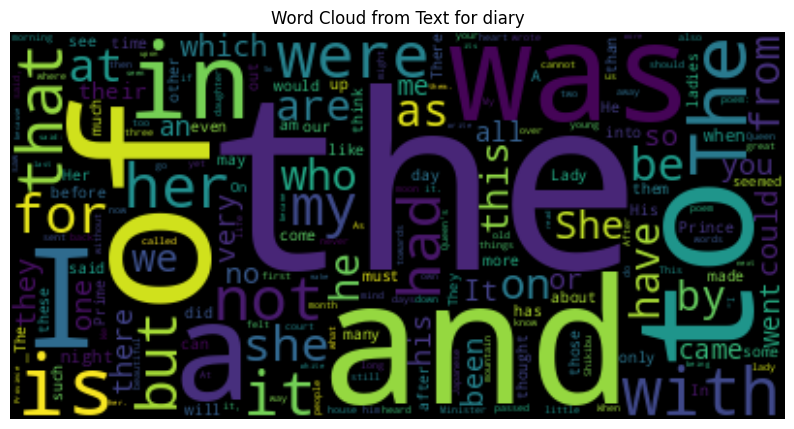

In [145]:
# prompt: generate the words cloud visual for diary

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'counts' is my RDD of (word, count) pairs
word_counts = counts.collectAsMap()

wordcloud = WordCloud().generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud from Text for diary") # Add this line
plt.axis("off")
plt.show()


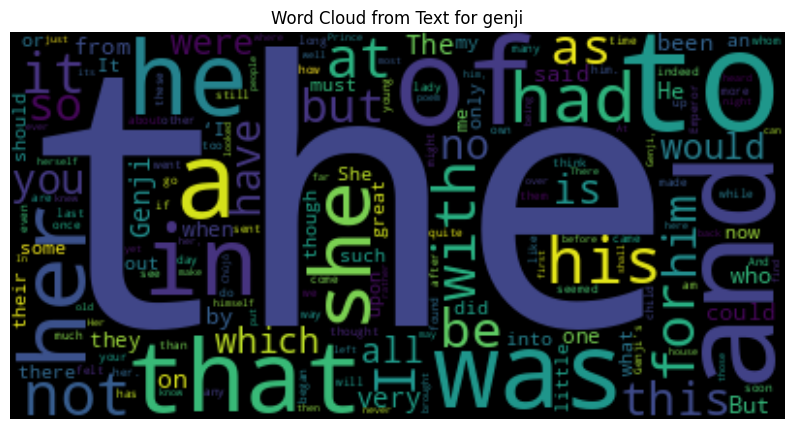

In [147]:
# Assuming 'counts' is my RDD of (word, count) pairs
word_counts2 = counts2.collectAsMap()

wordcloud = WordCloud().generate_from_frequencies(word_counts2)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud from Text for genji")
plt.axis("off")
plt.show()

In [134]:
# filter for only the pronouns
corpus_pronouns_diary = counts.filter(lambda x: x[0] in hls).collect()


In [135]:
corpus_pronouns_genji = counts2.filter(lambda x: x[0] in hls).collect()

In [136]:
print(corpus_pronouns_diary)

[('her', 364), ('his', 152), ('She', 186), ('hers', 1), ('He', 112), ('him', 61)]


In [141]:
print(corpus_pronouns_genji)

[('her', 1421), ('his', 939), ('She', 211), ('hers', 4), ('him', 515), ('He', 337)]


In [142]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Sort the pronoun counts
corpus_pronouns_diary_sorted = sorted(corpus_pronouns_diary, key=lambda x: x[1], reverse=True)
corpus_pronouns_genji_sorted = sorted(corpus_pronouns_genji, key=lambda x: x[1], reverse=True)

# Set a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create bar charts
pio.templates.default = "plotly_white"
fig_diary = px.bar(corpus_pronouns_diary_sorted,
                     x=[x[0] for x in corpus_pronouns_diary_sorted],
                     y=[x[1] for x in corpus_pronouns_diary_sorted],
                     labels={'x':'Pronoun', 'y':'Count'},
                     title='Pronoun Counts in Diary of Court Ladies of Old Japan',
                     color_discrete_sequence=colors)
fig_diary.show()

fig_genji = px.bar(corpus_pronouns_genji_sorted,
                     x=[x[0] for x in corpus_pronouns_genji_sorted],
                     y=[x[1] for x in corpus_pronouns_genji_sorted],
                     labels={'x':'Pronoun', 'y':'Count'},
                     title='Pronoun Counts in The Tale of Genji',
                     color_discrete_sequence=colors)
fig_genji.show()

In [148]:
# prompt: how to perform a  Hypothesis testing :
# H1: There is a statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns in the corpus.
# H2 (Bonus): The distribution of genders among corpus authors meaningfully impacts the observed pronoun frequencies.

import scipy.stats as stats

# Prepare data for hypothesis testing
# Extract counts for masculine and feminine subject and object pronouns
masculine_subject_diary = sum([count for (pronoun, count) in corpus_pronouns_diary if pronoun in ["He", "he"]])
feminine_subject_diary = sum([count for (pronoun, count) in corpus_pronouns_diary if pronoun in ["She", "she"]])
masculine_object_diary = sum([count for (pronoun, count) in corpus_pronouns_diary if pronoun in ["him", "his"]])
feminine_object_diary = sum([count for (pronoun, count) in corpus_pronouns_diary if pronoun in ["her", "hers"]])

masculine_subject_genji = sum([count for (pronoun, count) in corpus_pronouns_genji if pronoun in ["He", "he"]])
feminine_subject_genji = sum([count for (pronoun, count) in corpus_pronouns_genji if pronoun in ["She", "she"]])
masculine_object_genji = sum([count for (pronoun, count) in corpus_pronouns_genji if pronoun in ["him", "his"]])
feminine_object_genji = sum([count for (pronoun, count) in corpus_pronouns_genji if pronoun in ["her", "hers"]])

# Perform Chi-squared test for H1
# Contingency table for Diary
contingency_table_diary = [[masculine_subject_diary, feminine_subject_diary],
                          [masculine_object_diary, feminine_object_diary]]

# Chi-squared test for Diary
chi2_statistic_diary, p_value_diary, dof_diary, expected_diary = stats.chi2_contingency(contingency_table_diary)

# Contingency table for Genji
contingency_table_genji = [[masculine_subject_genji, feminine_subject_genji],
                          [masculine_object_genji, feminine_object_genji]]

# Chi-squared test for Genji
chi2_statistic_genji, p_value_genji, dof_genji, expected_genji = stats.chi2_contingency(contingency_table_genji)

# Print results
print("Hypothesis Testing Results:")
print("---------------------------")
print("Diary:")
print("Chi-squared statistic:", chi2_statistic_diary)
print("P-value:", p_value_diary)
print("Degrees of freedom:", dof_diary)
print("Expected frequencies:", expected_diary)
print("\nGenji:")
print("Chi-squared statistic:", chi2_statistic_genji)
print("P-value:", p_value_genji)
print("Degrees of freedom:", dof_genji)
print("Expected frequencies:", expected_genji)

# Interpret results
alpha = 0.05  # Significance level
if p_value_diary < alpha:
    print("\nFor Diary, we reject the null hypothesis. There is a statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.")
else:
    print("\nFor Diary, we fail to reject the null hypothesis. There is no statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.")

if p_value_genji < alpha:
    print("\nFor Genji, we reject the null hypothesis. There is a statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.")
else:
    print("\nFor Genji, we fail to reject the null hypothesis. There is no statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.")

# Bonus (H2): This requires additional information about the authors and their genders.
# You would need to perform a more complex analysis, potentially using logistic regression or similar methods,
# to assess the impact of author gender on pronoun frequencies.
# This is beyond the scope of this simple example.


Hypothesis Testing Results:
---------------------------
Diary:
Chi-squared statistic: 0.01928321605449052
P-value: 0.8895576033120968
Degrees of freedom: 1
Expected frequencies: [[110.55936073 187.44063927]
 [214.44063927 363.55936073]]

Genji:
Chi-squared statistic: 21.85959493008734
P-value: 2.933460835961906e-06
Degrees of freedom: 1
Expected frequencies: [[ 286.39276335  261.60723665]
 [1504.60723665 1374.39276335]]

For Diary, we fail to reject the null hypothesis. There is no statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.

For Genji, we reject the null hypothesis. There is a statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns.


# Interpretation:

## Diary Dataset

    Chi-squared statistic: 0.0193
    P-value: 0.8896
    Degrees of freedom: 1
    Expected frequencies: [[110.56, 187.44], [214.44, 363.56]]

The chi-squared statistic is very small (0.0193), indicating that the observed frequencies are close to the expected frequencies.

The p-value (0.8896) is much greater than the typical significance level of 0.05. This means that there is a high probability that any difference between observed and expected frequencies could be due to random chance.

Therefore, `we fail to reject the null hypothesis`, indicating that there is no statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns in the "Diary" dataset.


## Genji Dataset

    Chi-squared statistic: 21.8596
    P-value: 2.933e-06
    Degrees of freedom: 1
    Expected frequencies: [[286.39, 261.61], [1504.61, 1374.39]]

The chi-squared statistic (21.8596) is relatively large, suggesting a notable difference between observed and expected frequencies.

The p-value (2.933e-06) is extremely small and much lower than the typical threshold of 0.05. This indicates a very low probability that the observed differences could be due to random chance.

Therefore, `we reject the null hypothesis`, suggesting that there is a statistically significant difference between the frequencies of subject and object pronouns for masculine and feminine personal pronouns in the "Genji" dataset.

In summary, the analysis shows no significant difference in pronoun usage in the "Diary" dataset, while the "Genji" dataset displays significant differences. This could suggest different patterns of pronoun usage in these datasets, potentially influenced by various factors such as genre, style, or author intent.

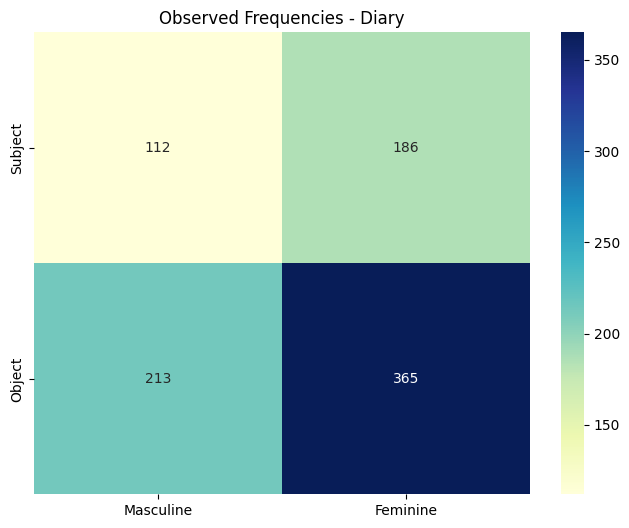

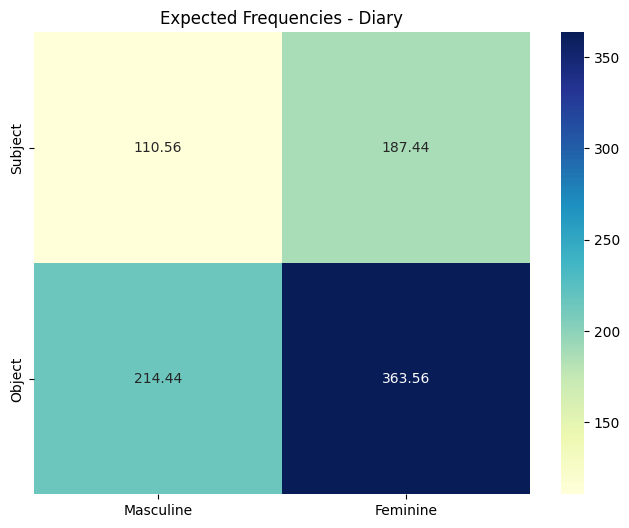

In [150]:
# prompt:  Heatmap
# A heatmap can visually represent the difference between observed and expected frequencies,
# with the intensity of the color indicating the magnitude of the difference.

import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_diary, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["Masculine", "Feminine"], yticklabels=["Subject", "Object"])
plt.title("Observed Frequencies - Diary")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(expected_diary, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=["Masculine", "Feminine"], yticklabels=["Subject", "Object"])
plt.title("Expected Frequencies - Diary")
plt.show()




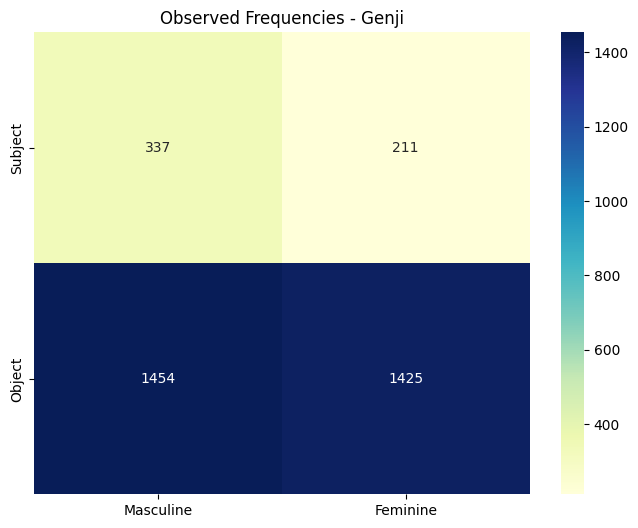

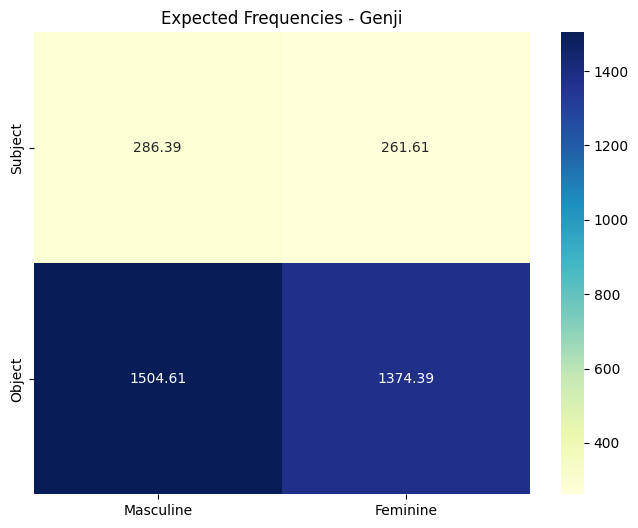

In [151]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_genji, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["Masculine", "Feminine"], yticklabels=["Subject", "Object"])
plt.title("Observed Frequencies - Genji")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(expected_genji, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=["Masculine", "Feminine"], yticklabels=["Subject", "Object"])
plt.title("Expected Frequencies - Genji")
plt.show()


# Reference
## Spark NLP Library

Spark NLP is an open-source natural language processing library built on Apache Spark. It provides state-of-the-art algorithms for processing and analyzing large-scale text data, with features such as named entity recognition, sentiment analysis, and part-of-speech tagging.
## Library Overview:
Developed by: John Snow Labs
Key Features: Named entity recognition, sentiment analysis, text classification, dependency parsing, part-of-speech tagging, spell checking, and more.
Integration: Works seamlessly with Apache Spark, enabling large-scale data processing.

## Documentation & Resources:
- Official Documentation: Spark NLP Documentation
- GitHub Repository: Spark NLP on GitHub

Tutorials and Examples: Provides a range of tutorials and example notebooks, which can be found on the official documentation page and GitHub repository.

## Usage in Project:
The library’s pre-trained models and customizable pipelines allowed for efficient processing of large text datasets, enabling the extraction and analysis of key linguistic features.


## Community and Support:
Spark NLP Forum: Spark NLP Forum
Stack Overflow: Tag questions with spark-nlp to get help from the community.